# seaborn color palette

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

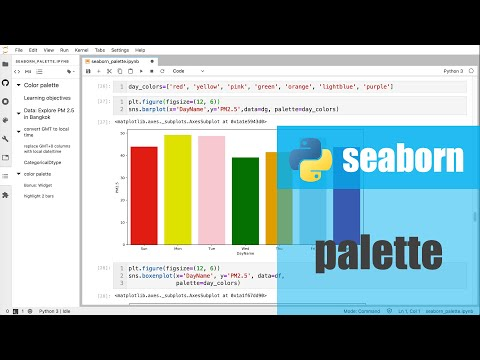

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('WNhiwTX_z5E', width=720, height=405)

## Learning objectives
* Work with date/time
* Categorize data (binning)
* Set seaborn color palette

## Data: Explore PM 2.5 in Bangkok
- http://berkeleyearth.lbl.gov/air-quality/local/Thailand/Bangkok/Bangkok
- http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
%matplotlib inline
%config InlineBackend.figure_format='retina'
# pd.set_option('display.max_rows', 10)

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.2.3
seaborn version = 0.11.1


In [4]:
pd.Timestamp.today()

Timestamp('2021-04-10 12:37:40.532218')

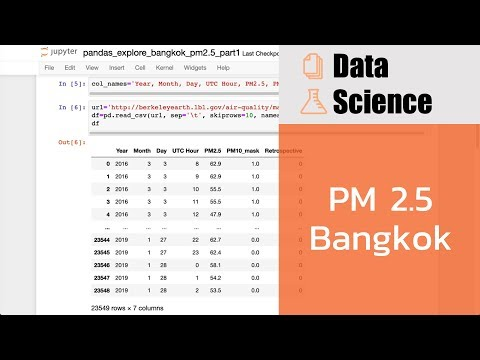

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('gu-wy11xEI0', width=720, height=405)

In [6]:
'Year, Month, Day, UTC Hour, PM2.5, PM10_mask, Retrospective'.split(', ')

['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective']

In [7]:
col_names='Year, Month, Day, UTC Hour, PM2.5, PM10_mask, Retrospective'.split(', ')

In [8]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/Bangkok_pm25.txt'
# url='http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt'
df=pd.read_csv(url, sep='\t', skiprows=10, names=col_names)
df

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1.0,0
1,2016,3,3,9,62.9,1.0,0
2,2016,3,3,10,55.5,1.0,0
3,2016,3,3,11,55.5,1.0,0
4,2016,3,3,12,47.9,1.0,0
...,...,...,...,...,...,...,...
30387,2020,1,24,3,28.6,0.0,0
30388,2020,1,24,4,32.2,0.0,0
30389,2020,1,24,5,33.0,0.0,0
30390,2020,1,24,6,31.5,0.0,0


In [9]:
df.drop(columns=['PM10_mask', 'Retrospective'], inplace=True)
df

,Year,Month,Day,UTC Hour,PM2.5
0,2016,3,3,8,62.9
1,2016,3,3,9,62.9
2,2016,3,3,10,55.5
3,2016,3,3,11,55.5
4,2016,3,3,12,47.9
...,...,...,...,...,...
30387,2020,1,24,3,28.6
30388,2020,1,24,4,32.2
30389,2020,1,24,5,33.0
30390,2020,1,24,6,31.5


In [10]:
df.rename(columns={'UTC Hour': 'Hour'}, inplace=True)

In [11]:
df

,Year,Month,Day,Hour,PM2.5
0,2016,3,3,8,62.9
1,2016,3,3,9,62.9
2,2016,3,3,10,55.5
3,2016,3,3,11,55.5
4,2016,3,3,12,47.9
...,...,...,...,...,...
30387,2020,1,24,3,28.6
30388,2020,1,24,4,32.2
30389,2020,1,24,5,33.0
30390,2020,1,24,6,31.5


### convert GMT to local time

In [12]:
# df['DateTime']=pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.to_timedelta(7, unit='h')
df['DateTime']=pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.to_timedelta('7 hours')

df[:10]

,Year,Month,Day,Hour,PM2.5,DateTime
0,2016,3,3,8,62.9,2016-03-03 15:00:00
1,2016,3,3,9,62.9,2016-03-03 16:00:00
2,2016,3,3,10,55.5,2016-03-03 17:00:00
3,2016,3,3,11,55.5,2016-03-03 18:00:00
4,2016,3,3,12,47.9,2016-03-03 19:00:00
5,2016,3,3,13,43.6,2016-03-03 20:00:00
6,2016,3,3,14,28.6,2016-03-03 21:00:00
7,2016,3,3,15,33.6,2016-03-03 22:00:00
8,2016,3,3,16,34.8,2016-03-03 23:00:00
9,2016,3,3,17,31.3,2016-03-04 00:00:00


#### replace GMT+0 columns with local date/time

* String format time reference: http://strftime.org/

In [13]:
df['Year']=df['DateTime'].dt.year
df['Month']=df['DateTime'].dt.month
df['Day']=df['DateTime'].dt.day
df['Hour']=df['DateTime'].dt.hour
df['Date']=pd.to_datetime(df[['Year', 'Month', 'Day']])

df['DayName']=df['DateTime'].dt.strftime('%a')
df['DayOfYear']=df['DateTime'].dt.strftime('%-j')

df

,Year,Month,Day,Hour,PM2.5,DateTime,Date,DayName,DayOfYear
0,2016,3,3,15,62.9,2016-03-03 15:00:00,2016-03-03,Thu,63
1,2016,3,3,16,62.9,2016-03-03 16:00:00,2016-03-03,Thu,63
2,2016,3,3,17,55.5,2016-03-03 17:00:00,2016-03-03,Thu,63
3,2016,3,3,18,55.5,2016-03-03 18:00:00,2016-03-03,Thu,63
4,2016,3,3,19,47.9,2016-03-03 19:00:00,2016-03-03,Thu,63
...,...,...,...,...,...,...,...,...,...
30387,2020,1,24,10,28.6,2020-01-24 10:00:00,2020-01-24,Fri,24
30388,2020,1,24,11,32.2,2020-01-24 11:00:00,2020-01-24,Fri,24
30389,2020,1,24,12,33.0,2020-01-24 12:00:00,2020-01-24,Fri,24
30390,2020,1,24,13,31.5,2020-01-24 13:00:00,2020-01-24,Fri,24


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30392 entries, 0 to 30391
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Year       30392 non-null  int64         
 1   Month      30392 non-null  int64         
 2   Day        30392 non-null  int64         
 3   Hour       30392 non-null  int64         
 4   PM2.5      30392 non-null  float64       
 5   DateTime   30392 non-null  datetime64[ns]
 6   Date       30392 non-null  datetime64[ns]
 7   DayName    30392 non-null  object        
 8   DayOfYear  30392 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 2.1+ MB


In [15]:
df[['DayName', 'PM2.5']].groupby('DayName').mean()

,PM2.5
DayName,
Fri,25.322079
Mon,26.232062
Sat,25.417109
Sun,25.039387
Thu,25.507052
Tue,26.162240
Wed,25.934843


### CategoricalDtype

In [16]:
from pandas.api.types import CategoricalDtype
cat_dayname = CategoricalDtype(categories=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], ordered=True)

In [17]:
cat_dayname

CategoricalDtype(categories=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], ordered=True)

In [18]:
df['DayName']=df['DayName'].astype(cat_dayname)
df

,Year,Month,Day,Hour,PM2.5,DateTime,Date,DayName,DayOfYear
0,2016,3,3,15,62.9,2016-03-03 15:00:00,2016-03-03,Thu,63
1,2016,3,3,16,62.9,2016-03-03 16:00:00,2016-03-03,Thu,63
2,2016,3,3,17,55.5,2016-03-03 17:00:00,2016-03-03,Thu,63
3,2016,3,3,18,55.5,2016-03-03 18:00:00,2016-03-03,Thu,63
4,2016,3,3,19,47.9,2016-03-03 19:00:00,2016-03-03,Thu,63
...,...,...,...,...,...,...,...,...,...
30387,2020,1,24,10,28.6,2020-01-24 10:00:00,2020-01-24,Fri,24
30388,2020,1,24,11,32.2,2020-01-24 11:00:00,2020-01-24,Fri,24
30389,2020,1,24,12,33.0,2020-01-24 12:00:00,2020-01-24,Fri,24
30390,2020,1,24,13,31.5,2020-01-24 13:00:00,2020-01-24,Fri,24


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30392 entries, 0 to 30391
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Year       30392 non-null  int64         
 1   Month      30392 non-null  int64         
 2   Day        30392 non-null  int64         
 3   Hour       30392 non-null  int64         
 4   PM2.5      30392 non-null  float64       
 5   DateTime   30392 non-null  datetime64[ns]
 6   Date       30392 non-null  datetime64[ns]
 7   DayName    30392 non-null  category      
 8   DayOfYear  30392 non-null  object        
dtypes: category(1), datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 1.9+ MB


In [20]:
df[['DayName', 'PM2.5']].groupby('DayName').mean()

,PM2.5
DayName,
Sun,25.039387
Mon,26.232062
Tue,26.162240
Wed,25.934843
Thu,25.507052
Fri,25.322079
Sat,25.417109


In [21]:
ds=df[(df.Year == 2020) & (df.Month == 1)]
ds

,Year,Month,Day,Hour,PM2.5,DateTime,Date,DayName,DayOfYear
29825,2020,1,1,0,36.5,2020-01-01 00:00:00,2020-01-01,Wed,1
29826,2020,1,1,1,41.6,2020-01-01 01:00:00,2020-01-01,Wed,1
29827,2020,1,1,2,44.7,2020-01-01 02:00:00,2020-01-01,Wed,1
29828,2020,1,1,3,35.7,2020-01-01 03:00:00,2020-01-01,Wed,1
29829,2020,1,1,4,28.6,2020-01-01 04:00:00,2020-01-01,Wed,1
...,...,...,...,...,...,...,...,...,...
30387,2020,1,24,10,28.6,2020-01-24 10:00:00,2020-01-24,Fri,24
30388,2020,1,24,11,32.2,2020-01-24 11:00:00,2020-01-24,Fri,24
30389,2020,1,24,12,33.0,2020-01-24 12:00:00,2020-01-24,Fri,24
30390,2020,1,24,13,31.5,2020-01-24 13:00:00,2020-01-24,Fri,24


In [22]:
dg=ds[['DayName', 'PM2.5']].groupby('DayName').mean().reset_index()
dg

,DayName,PM2.5
0,Sun,46.570833
1,Mon,49.106944
2,Tue,48.722222
3,Wed,39.127083
4,Thu,41.456250
5,Fri,50.062069
6,Sat,48.340278


### color palette

<AxesSubplot:xlabel='DayName', ylabel='PM2.5'>

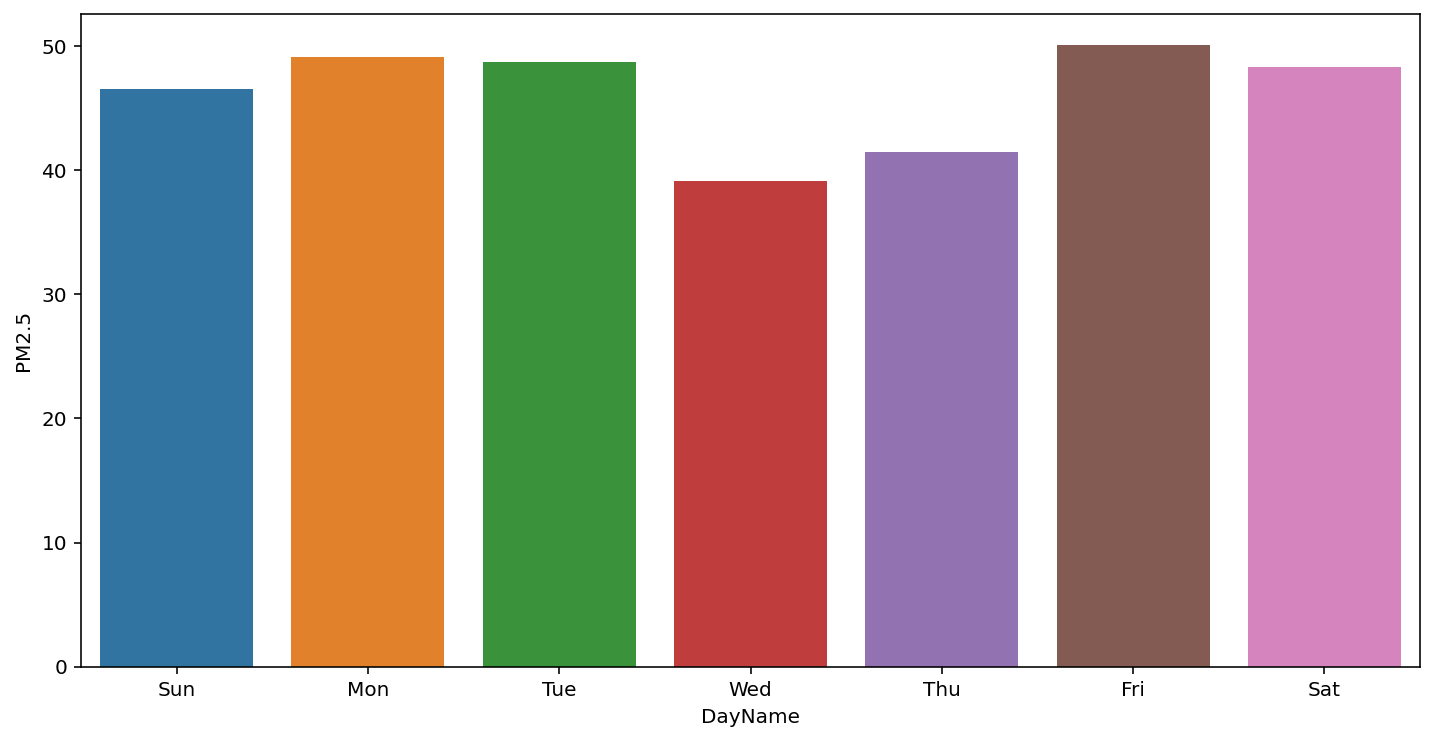

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DayName',y='PM2.5',data=dg)

<AxesSubplot:xlabel='DayName', ylabel='PM2.5'>

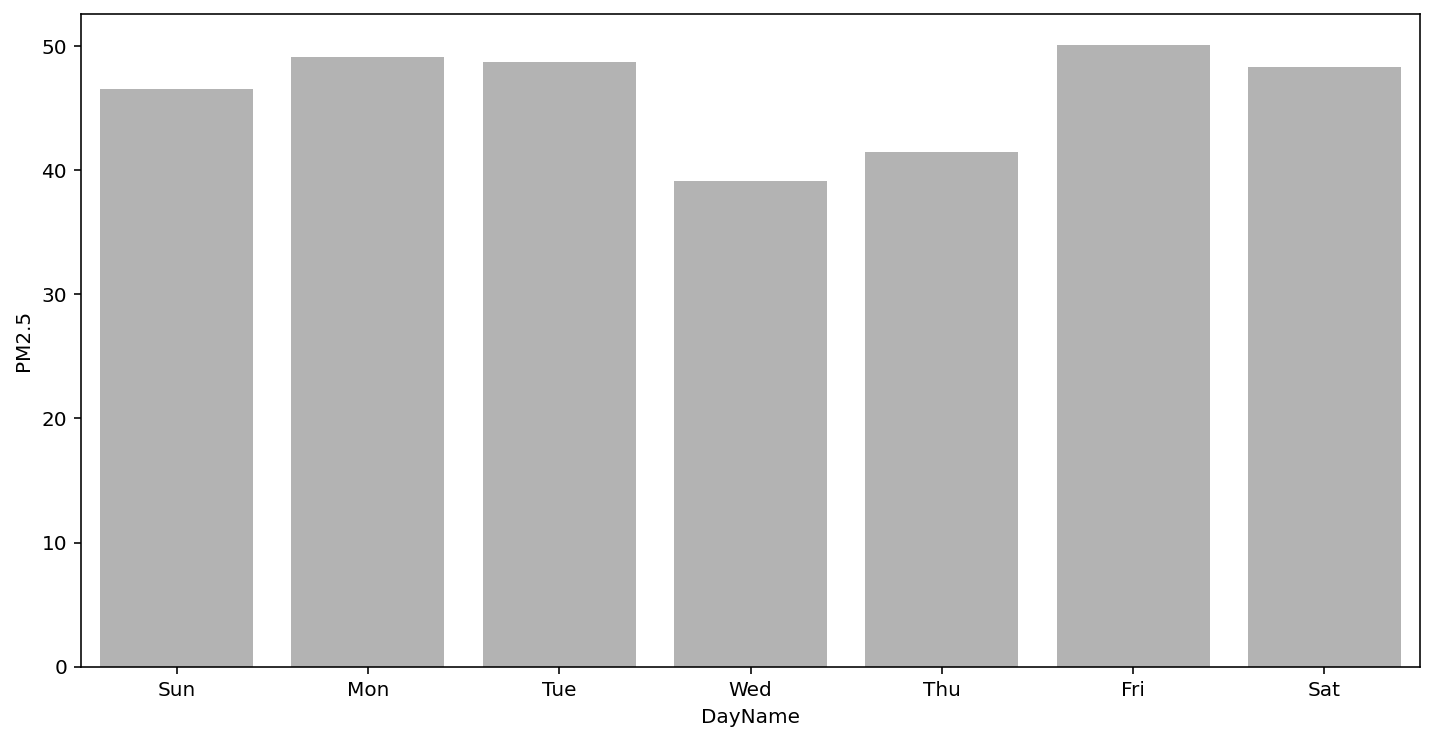

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DayName',y='PM2.5',data=dg, color='.7')

<AxesSubplot:xlabel='DayName', ylabel='PM2.5'>

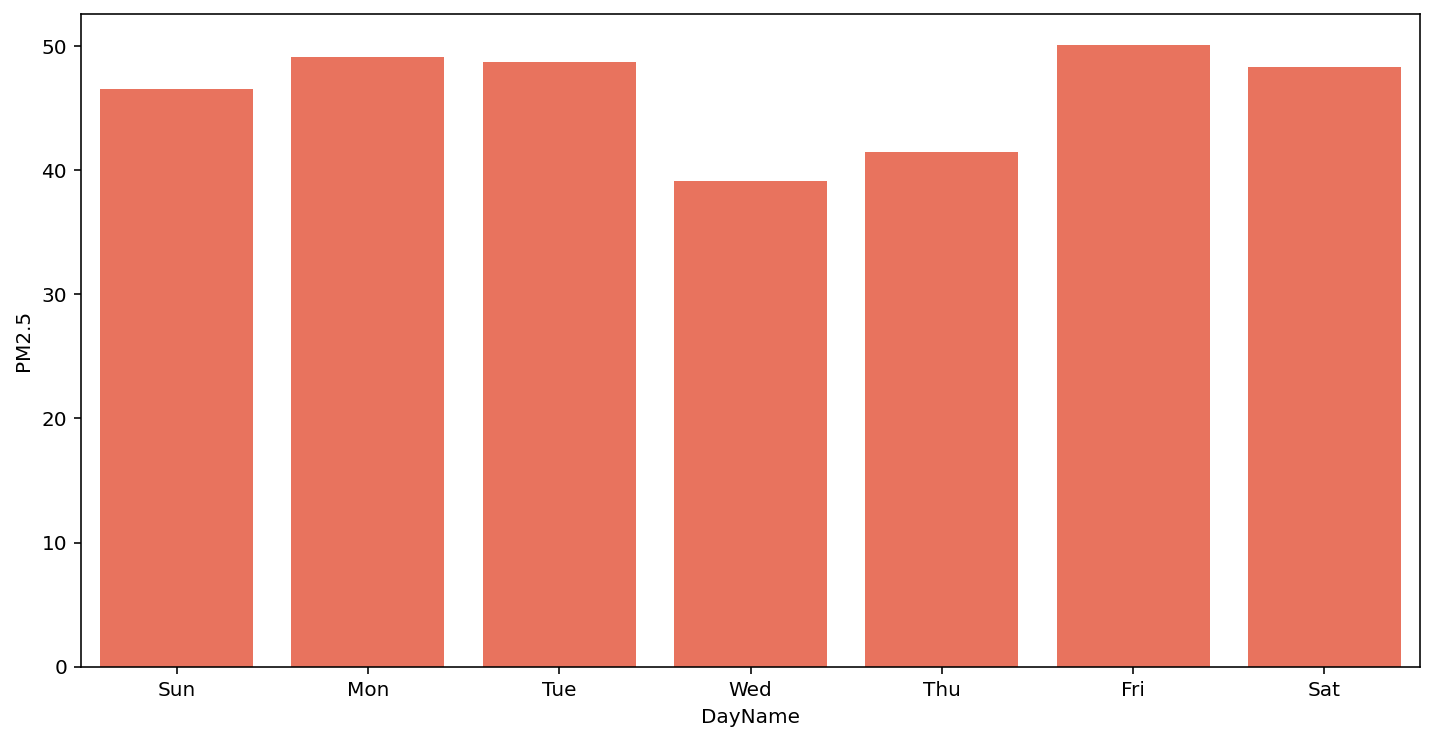

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DayName',y='PM2.5',data=dg, color='tomato')

In [26]:
day_colors=['red', 'yellow', 'pink', 'green', 'orange', 'lightblue', 'purple']

<AxesSubplot:xlabel='DayName', ylabel='PM2.5'>

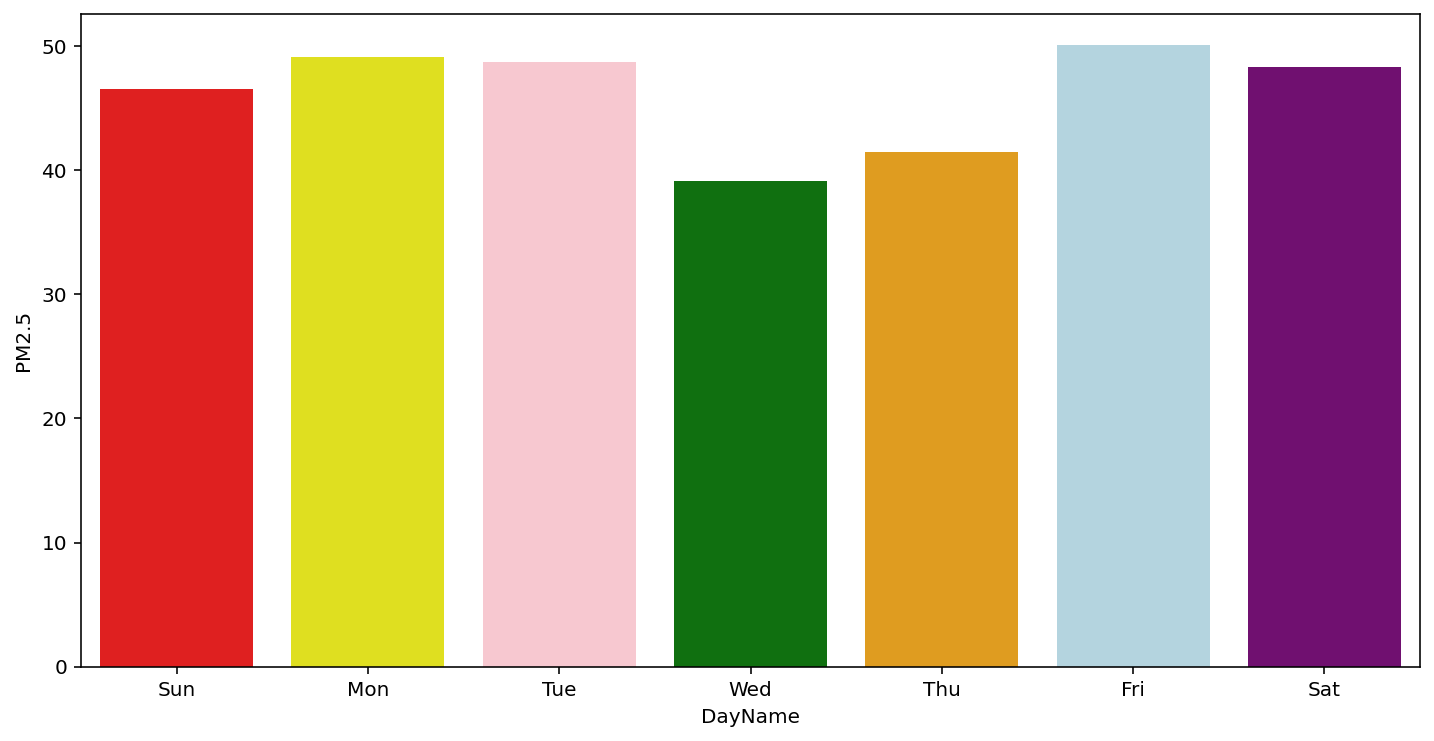

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DayName',y='PM2.5',data=dg, palette=day_colors)

<AxesSubplot:xlabel='DayName', ylabel='PM2.5'>

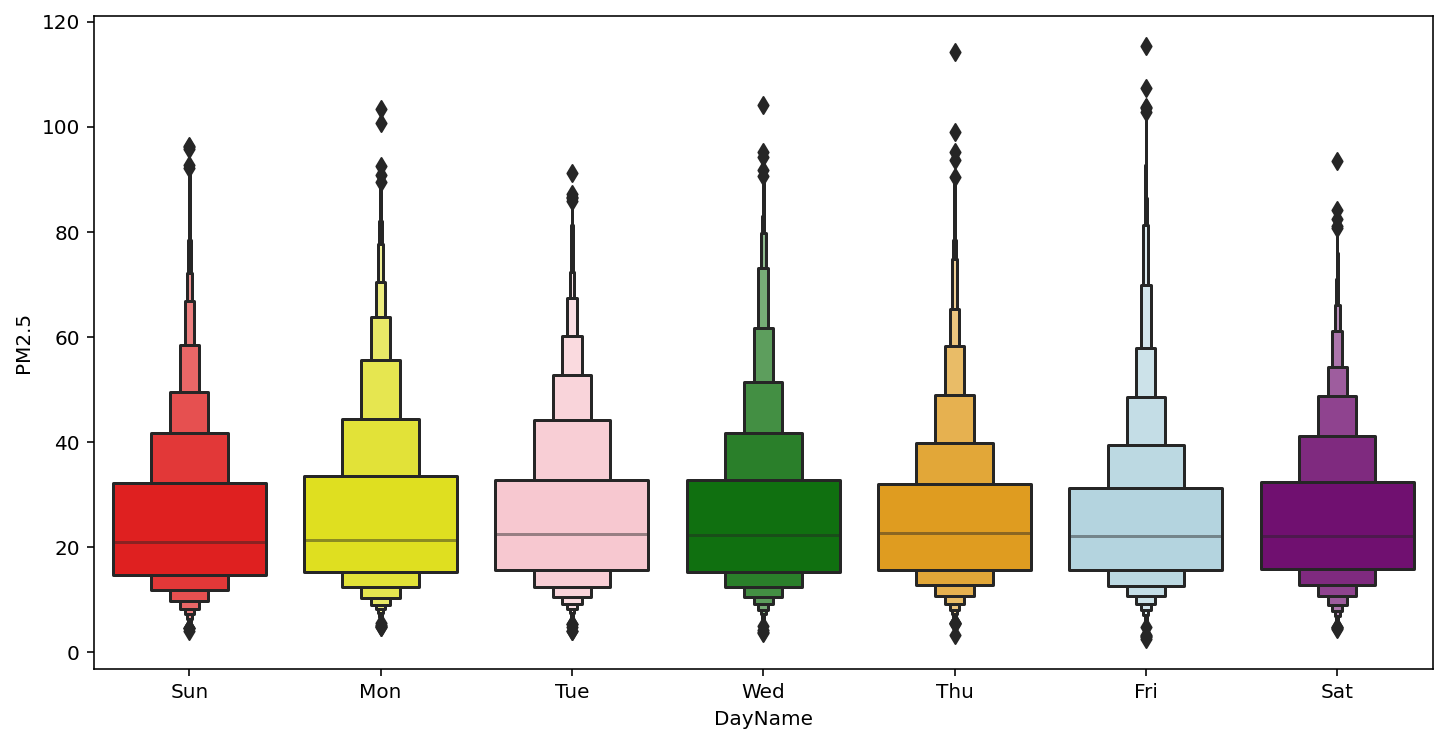

In [28]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x='DayName', y='PM2.5', data=df, 
              palette=day_colors)

<AxesSubplot:xlabel='DayName', ylabel='PM2.5'>

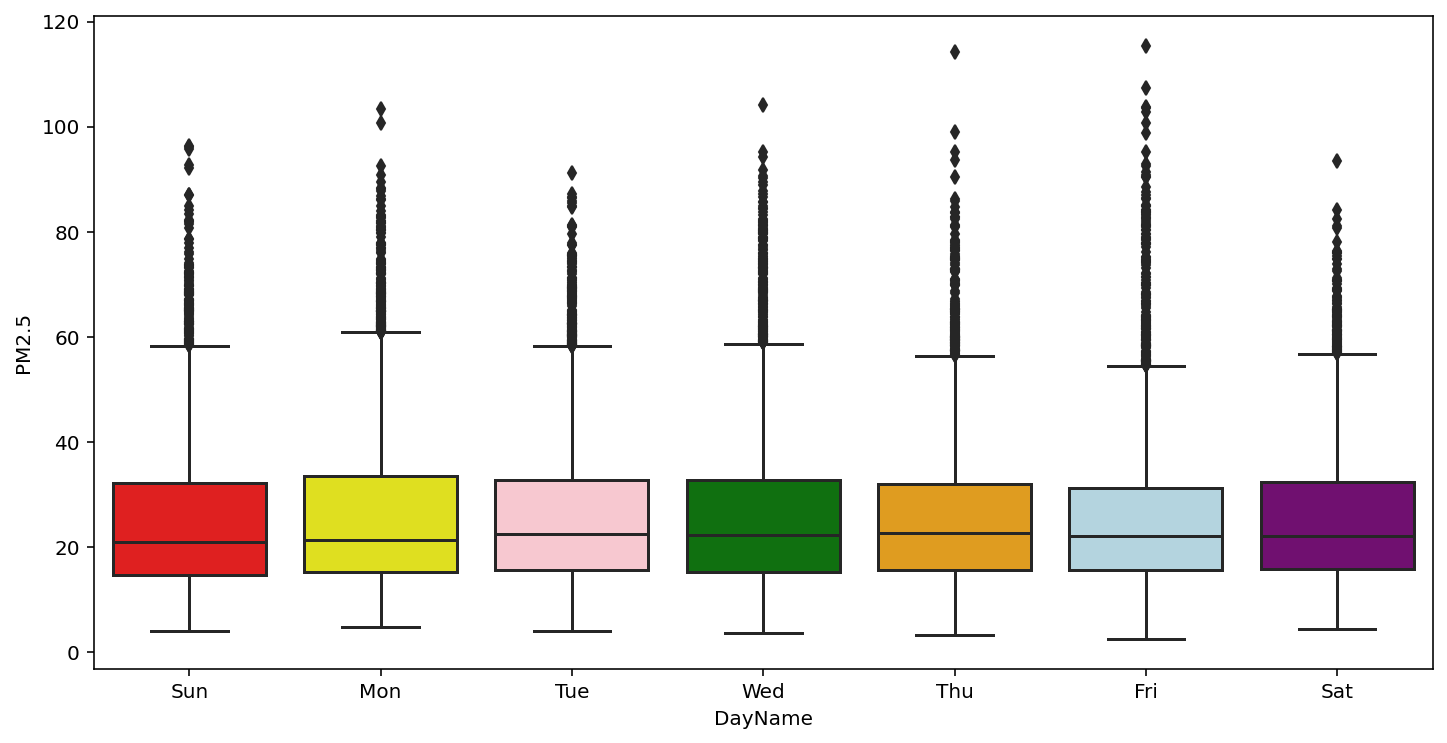

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayName', y='PM2.5', data=df, 
              palette=day_colors)

In [30]:
dg

,DayName,PM2.5
0,Sun,46.570833
1,Mon,49.106944
2,Tue,48.722222
3,Wed,39.127083
4,Thu,41.456250
5,Fri,50.062069
6,Sat,48.340278


In [31]:
dg.DayName.unique()

['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
Categories (7, object): ['Sun' < 'Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat']

In [32]:
colors=['black' if c=='Mon' else '.8' for c in dg.DayName.unique()]
colors

['.8', 'black', '.8', '.8', '.8', '.8', '.8']

<AxesSubplot:xlabel='DayName', ylabel='PM2.5'>

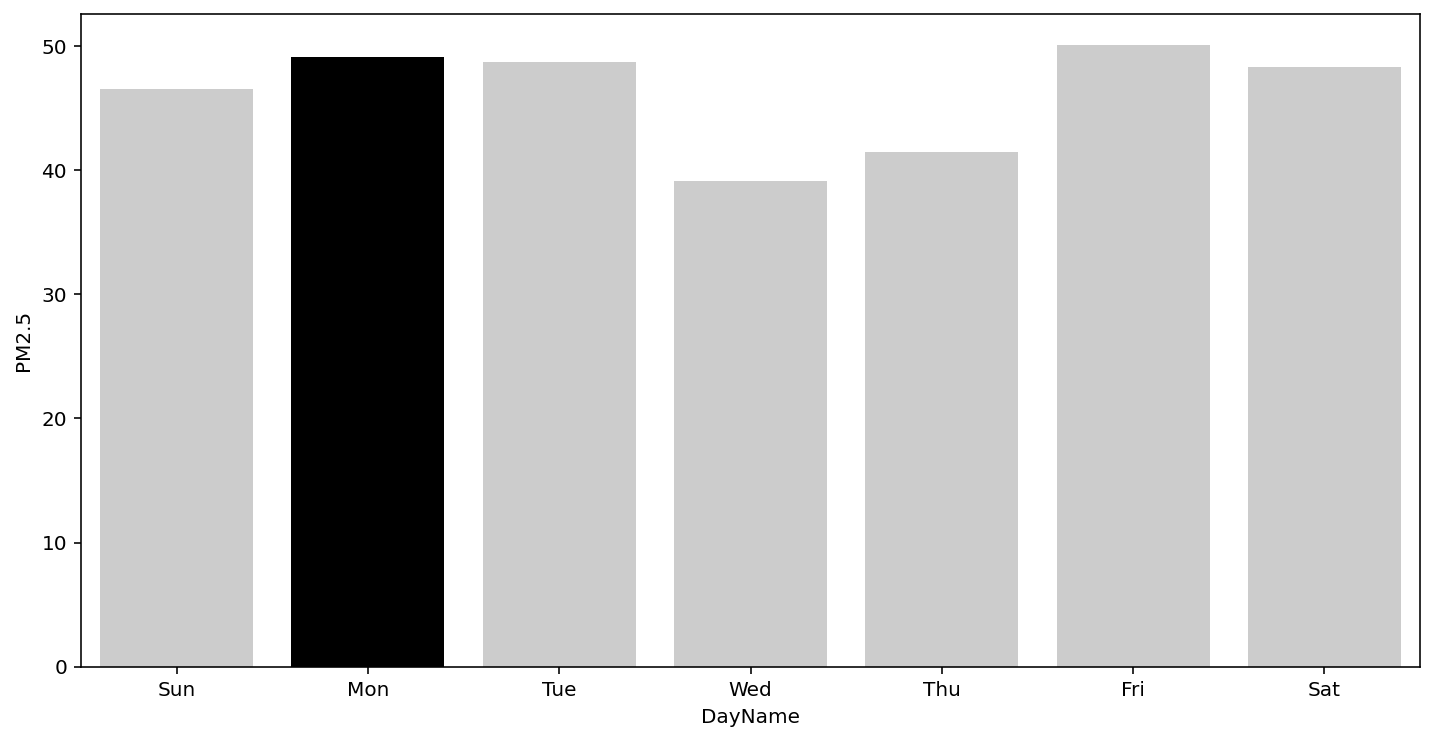

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DayName',y='PM2.5',data=dg, palette=colors)

---

#### Bonus: Widget

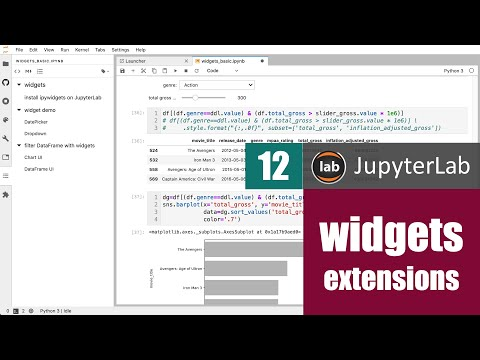

In [34]:
from IPython.display import YouTubeVideo
YouTubeVideo('_YrB8JblQz8', width=720, height=405)

In [35]:
import ipywidgets as widgets
from ipywidgets import interact

In [36]:
w_ddl_dayname=widgets.Dropdown(
    options=dg.DayName.unique(),
    description='day name:',
    disabled=False,
)

# display(w_ddl_dayname)

@interact
def plot_chart(ddl_dayname=w_ddl_dayname):
    print(ddl_dayname)
    colors=['gold' if c==ddl_dayname else '.8' for c in dg.DayName.unique()]
#     print(colors)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='DayName',y='PM2.5',data=dg, palette=colors)

interactive(children=(Dropdown(description='day name:', options=('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sa…

#### highlight 2 bars

In [37]:
w_ddl_dayname1=widgets.Dropdown(
    options=dg.DayName.unique(),
    description='day name 1:',
    disabled=False,
)
w_ddl_dayname2=widgets.Dropdown(
    options=dg.DayName.unique(),
    description='day name 2:',
    disabled=False,
)
# display(ddl_dayname1)
# display(ddl_dayname2)

@interact
def plot_chart(ddl_dayname1=w_ddl_dayname1, ddl_dayname2=w_ddl_dayname2):
    colors=['tomato' if c in [ddl_dayname1, ddl_dayname2] else '.8' for c in dg.DayName.unique()]
#     colors

    plt.figure(figsize=(12, 6))
    sns.barplot(x='DayName',y='PM2.5',data=dg, palette=colors)

interactive(children=(Dropdown(description='day name 1:', options=('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', '…